## <b> Problem Statement :
Gucci (Italian luxury brand of fashion and leather goods) wants to set up a shop in the mall. You need to send push notification to the customer about this event. Find who will be  the customers for the targeted marketing. </b>

#### <b> Initial Hypothesis : </b>

#### Annual Income Vs Spending Score -

#### Mostly five types of customer :

* Careful : High Income and Low Spending Score

* Standard : Average Income and Average Spending Score

* Target :  High Income and High Spending Score

* Careless : Low Income and High Spending Score

* Sensible : Low Income and Low Spending Score


In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [131]:
customers = pd.read_csv('/content/Mall_Customers.csv')

In [132]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [133]:
customers.drop(columns='CustomerID', inplace=True)

In [134]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
customers['Gender'] = le.fit_transform(df['Gender'])

In [135]:
X = customers[['Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']].values #take the data of columns in the form of 2d array

In [136]:
X

array([[  1,  19,  15,  39],
       [  1,  21,  15,  81],
       [  0,  20,  16,   6],
       [  0,  23,  16,  77],
       [  0,  31,  17,  40],
       [  0,  22,  17,  76],
       [  0,  35,  18,   6],
       [  0,  23,  18,  94],
       [  1,  64,  19,   3],
       [  0,  30,  19,  72],
       [  1,  67,  19,  14],
       [  0,  35,  19,  99],
       [  0,  58,  20,  15],
       [  0,  24,  20,  77],
       [  1,  37,  20,  13],
       [  1,  22,  20,  79],
       [  0,  35,  21,  35],
       [  1,  20,  21,  66],
       [  1,  52,  23,  29],
       [  0,  35,  23,  98],
       [  1,  35,  24,  35],
       [  1,  25,  24,  73],
       [  0,  46,  25,   5],
       [  1,  31,  25,  73],
       [  0,  54,  28,  14],
       [  1,  29,  28,  82],
       [  0,  45,  28,  32],
       [  1,  35,  28,  61],
       [  0,  40,  29,  31],
       [  0,  23,  29,  87],
       [  1,  60,  30,   4],
       [  0,  21,  30,  73],
       [  1,  53,  33,   4],
       [  1,  18,  33,  92],
       [  0,  

### <b> How should we Choose the Number of Clusters in Hierarchical Clustering? </b>

- A dendrogram is a tree-like diagram that records the sequences of merges or splits.More the distance of the vertical lines in the dendrogram, more the distance between those clusters.

- We can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line).

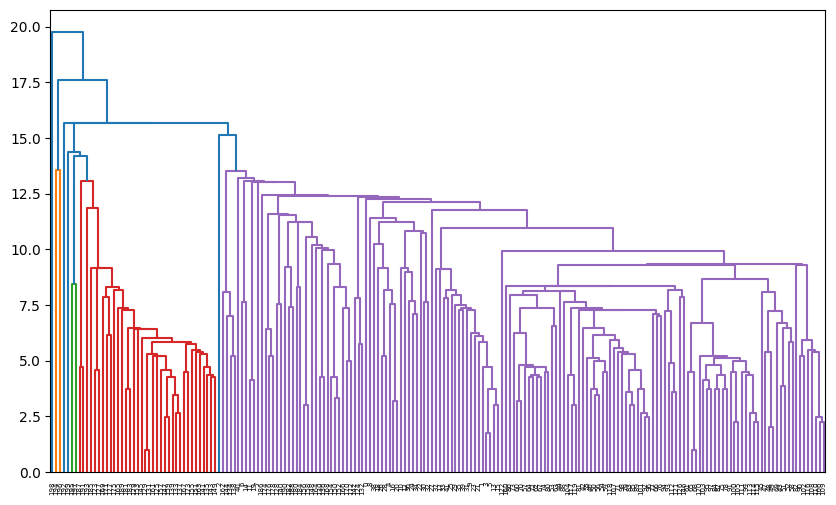

In [137]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10,6))
dendrogram = sch.dendrogram(sch.linkage(X, method='single'))

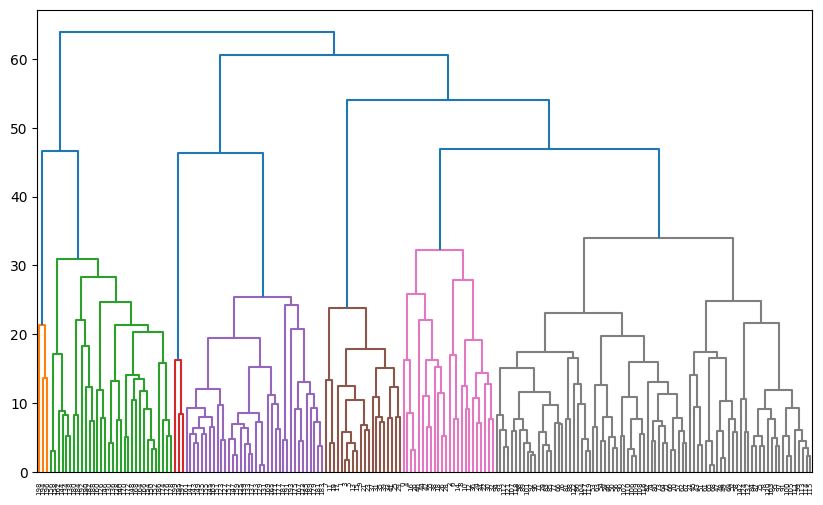

In [138]:
plt.figure(figsize=(10,6))
dendrogram = sch.dendrogram(sch.linkage(X, method='average'))

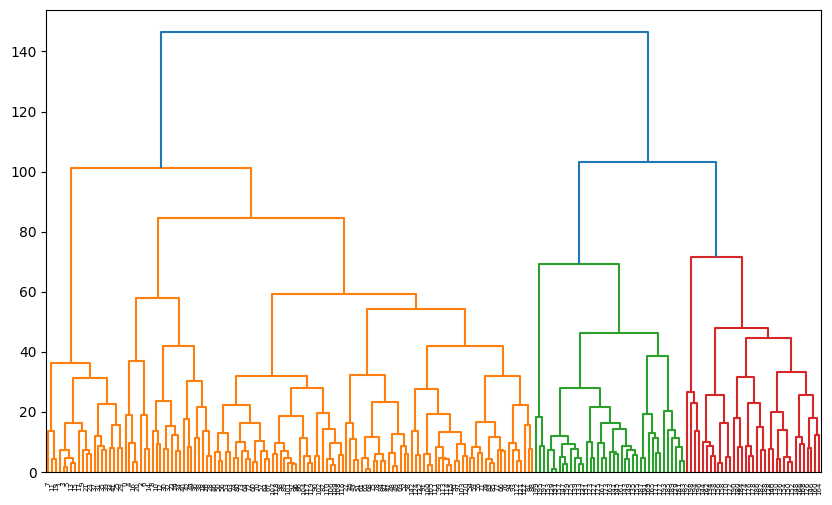

In [139]:
plt.figure(figsize=(10,6))
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))

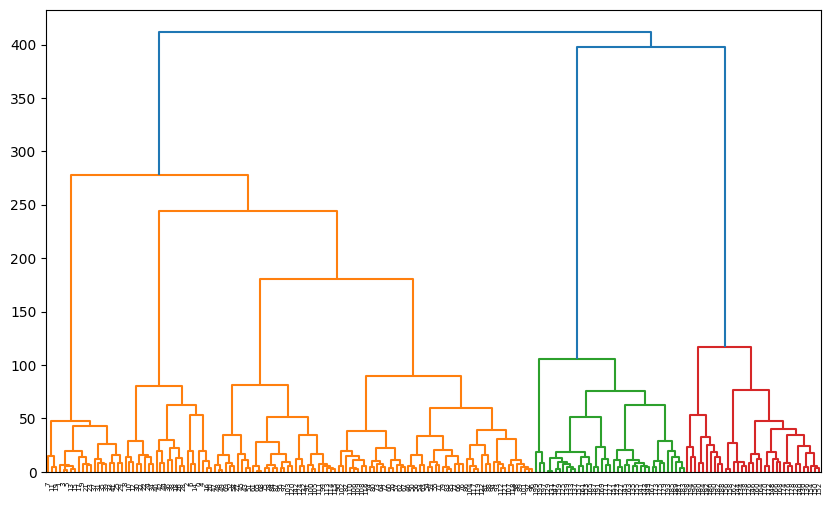

In [140]:
plt.figure(figsize=(10,6))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

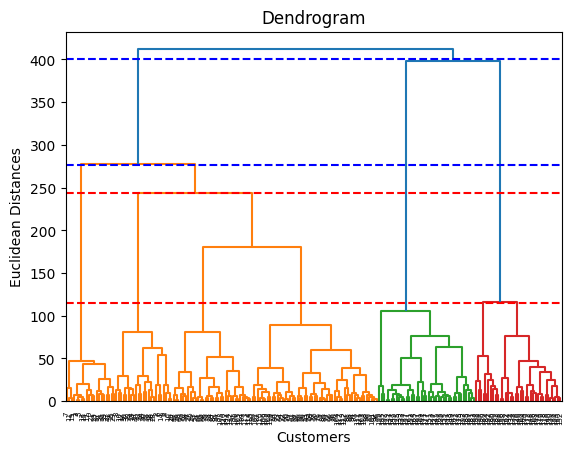

In [141]:

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=400, color='b', linestyle='--')
plt.axhline(y=277, color='b', linestyle='--')
plt.axhline(y=244, color='r', linestyle='--')
plt.axhline(y=115, color='r', linestyle='--')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

**No of cluster in the given data is 5**

#### **Apply Agglomerative Clustering on the Data**

In [142]:
from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

y = agg_cluster.fit_predict(X) # gives us the cluser number in which the all the datapoints have been put

In [143]:
y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [144]:
customers['cluster_id'] = pd.DataFrame(y)

In [145]:
customers

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_id
0,1,19,15,39,4
1,1,21,15,81,3
2,0,20,16,6,4
3,0,23,16,77,3
4,0,31,17,40,4
...,...,...,...,...,...
195,0,35,120,79,2
196,0,45,126,28,1
197,1,32,126,74,2
198,1,32,137,18,1


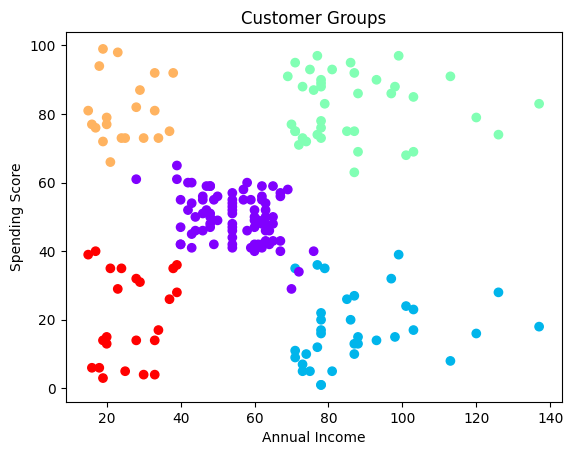

In [146]:
plt.scatter(customers['Annual Income (k$)'], customers['Spending Score (1-100)'], c=y , cmap = 'rainbow')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()